In [72]:
import numpy as np
import cv2
import sys
import tiffcapture as tc
import matplotlib.pyplot as plt
from skimage import io
from scipy import ndimage as ndi
from skimage.filters import gaussian
from skimage.filters import sobel
from skimage import feature
from skimage.exposure import equalize_hist
from skimage.feature import canny
from scipy.ndimage.morphology import binary_fill_holes
from skimage.measure import label
from skimage.measure import regionprops
import irtemp


In [2]:
sys.path.insert(0, '/Users/shrilakshmisbonageri/Desktop/UW/DIRECT/capstone/musical-robot/musicalrobot')

In [3]:
frames = []
tiff = tc.opentiff('../doc/ChCl_CA_DES_96_5_17_19.tiff')
for img in tiff:
    frames.append(img)

In [4]:
len(frames)

3076

In [6]:
test_frames = []
test_tiff = tc.opentiff('../doc/TestVideo.tiff')
for img in test_tiff:
    test_frames.append(img)

In [7]:
image = test_frames[100]

In [8]:
gaus = gaussian(image,sigma=0.5)
sob = sobel(gaus)
edges = sobel(sob)>0.00015

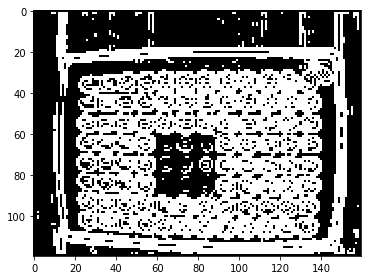

In [9]:
io.imshow(edges)

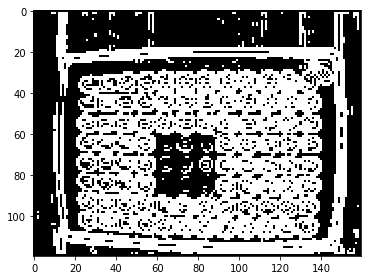

In [10]:
io.imshow(edges)

In [14]:
img1 = test_frames[400][20:113,15:145]
sharp_img1 = equalize_hist(img1, nbins=256, mask=None)

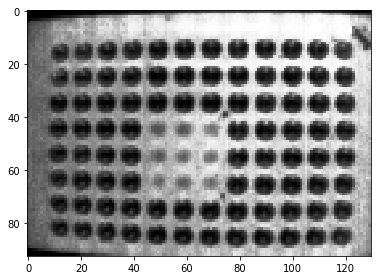

In [15]:
io.imshow(sharp_img1)

In [103]:
# gaus = gaussian(sharp_img1, sigma=0.5)
edges1 = feature.canny(gaus)>0.5

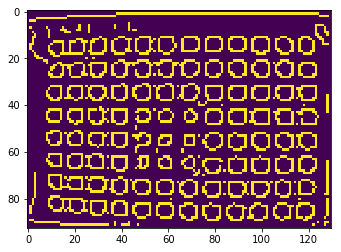

In [111]:
plt.imshow(edges1)

In [150]:
gaus = gaussian(sharp_img2, sigma=0.5)
sob = sobel(gaussian(sharp_img2, sigma=0.5))
edges = sobel(gaussian(sharp_img2, sigma=0.5))

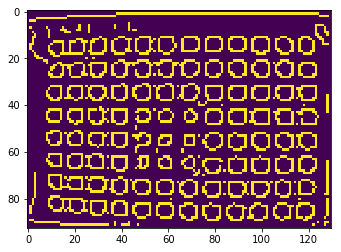

In [152]:
plt.imshow(edges1)

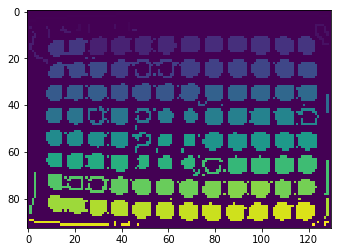

In [153]:
filled_wells = binary_fill_holes(edges1)
labeled_wells = label(filled_wells)
plt.imshow(labeled_wells)

### Working on a frame from the latest video

#### Using Contrast Limited Adaptive Histogram Equalization 

(82, 118)

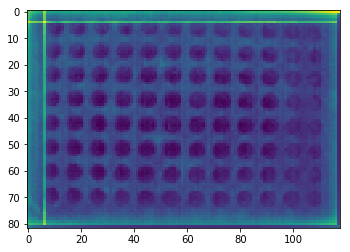

In [197]:
from skimage.exposure import equalize_adapthist
img2 = frames[200][16:98,20:138]
sharp_img2 = equalize_adapthist(img2,nbins=1000)
plt.imshow(sharp_img2)
img2.shape

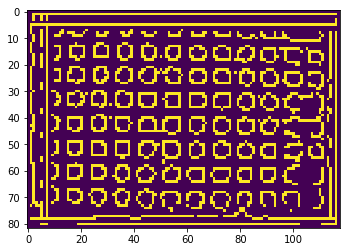

In [198]:
edges2 = feature.canny(sharp_img2)
plt.imshow(edges2)

### Rescaling contrast

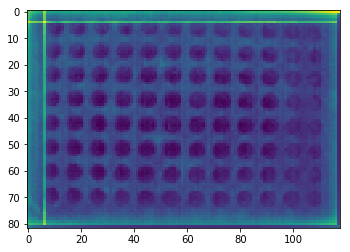

In [201]:
from skimage.exposure import rescale_intensity
rescale = rescale_intensity(sharp_img2, in_range='image', out_range='dtype')
plt.imshow(rescale)

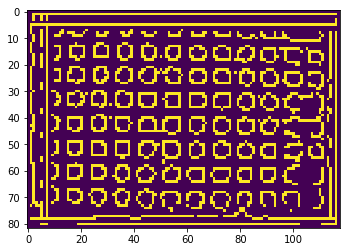

In [203]:
edges_rescale = feature.canny(rescale)
plt.imshow(edges_rescale)

(-0.5, 117.5, 81.5, -0.5)

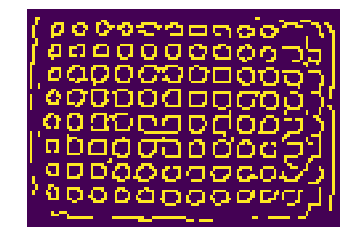

In [192]:
clear_edges = remove_small_objects(edges2,min_size = 2)

plt.imshow(clear_edges)
plt.axis('off')

### Trying ORB on equalized histogram (increased contrast) images

In [22]:
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)

In [23]:
descriptor_extractor = ORB(n_keypoints=96)

In [25]:
descriptor_extractor.detect_and_extract(sharp_img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(sharp_img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

In [29]:
matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)

Text(0.5, 1.0, 'Matching features')

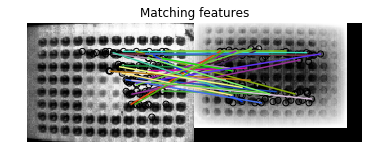

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=1)
plot_matches(ax, sharp_img1, sharp_img2, keypoints1, keypoints2, matches12)
ax.axis('off')
ax.set_title("Matching features")



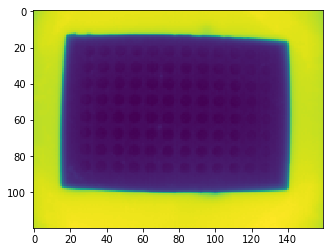

In [152]:
tiff = tc.opentiff('../doc/ChCl_CA_DES_96_5_17_19.tiff')
plt.imshow(tiff.read()[1])
plt.show()
tiff.release()

In [153]:
cap= cv2.VideoCapture('../doc/ChCl_CA_DES_96_5_17_19.tiff')
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imwrite('frame'+str(i)+'.jpg',frame)
    i+=1
 
cap.release()
cv2.destroyAllWindows()